In [69]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_excel('/Users/adriandominguezcastro/Desktop/Full-Analysis/Data.xlsx')
print(df)


         Eads  Bader-charge  Ave-O2p-up  Ave-O2p-down  Ave-diff-EN  \
0   -0.225862     -1.343006   -1.936702     -1.838248        1.822   
1   -0.661859     -1.255101   -2.141250     -2.020818        1.704   
2   -0.428172     -1.343006   -1.963130     -1.875873        1.704   
3   -0.549913     -1.255101   -2.132857     -2.039110        1.772   
4   -1.541096     -1.255101   -2.137748     -2.017025        1.824   
..        ...           ...         ...           ...          ...   
331 -0.495133     -1.275582   -1.946717     -1.913315        0.970   
332 -0.668189     -1.144416   -2.003036     -1.794526        1.892   
333 -0.697067     -1.152050   -1.958336     -1.726371        1.466   
334 -1.995395     -1.130833   -1.859615     -1.780119        1.398   
335 -0.808152     -1.039524   -2.183942     -2.047090        1.654   

     Ave-diff-IE  Neighbor 1  Neighbor 2  Neighbor 3  Neighbor 4  Neighbor 5  \
0         5.6248    0.210500    1.053500    0.210500    1.053500    0.176083   

# Linear Regression (one-feature)

In [71]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [72]:
data = pd.read_excel('/Users/adriandominguezcastro/Desktop/Full-Analysis/Data.xlsx')
#print(data)

In [73]:
dataset = data.values
Y = dataset[:,0:1]
X = dataset[:,1:2]

In [74]:
# I used before random_state=42
X_train_one_LR, X_test_one_LR, Y_train_one_LR, Y_test_one_LR = train_test_split(X, Y, random_state=42, train_size=0.8,test_size=0.2, shuffle=True)

In [75]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train_one_LR, Y_train_one_LR)

LinearRegression()

In [76]:
# Make predictions using the testing set
y_pred_one_LR = reg.predict(X_test_one_LR)

In [77]:
# R2
y_pred_train_one_LR = reg.predict(X_train_one_LR) 
y_pred_one_LR = reg.predict(X_test_one_LR)

print('Score on training set:', reg.score(X_train_one_LR, Y_train_one_LR)) 
print('Score on test set:', reg.score(X_test_one_LR, Y_test_one_LR))

Score on training set: 0.04755218907277803
Score on test set: 0.06532179764367563


In [78]:
# MAE

from sklearn.metrics import mean_absolute_error 

mae_train = mean_absolute_error(y_pred_train_one_LR, Y_train_one_LR) 
mae_test = mean_absolute_error(y_pred_one_LR, Y_test_one_LR) 
print('MAE on training set:', mae_train)
print('MAE on testing set:', mae_test)

MAE on training set: 0.20865612686997023
MAE on testing set: 0.1932400334279599


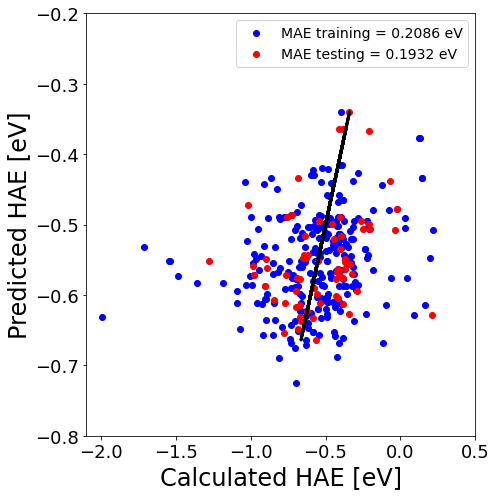

In [82]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7));


ax.scatter(Y_train_one_LR,y_pred_train_one_LR, color='blue', label='MAE training = 0.2086 eV');
ax.scatter(Y_test_one_LR, y_pred_one_LR, color='red', label='MAE testing = 0.1932 eV');




#ax.plot(X, reg.predict(X), color='red',linewidth=3);

plt.xlim((-2.1,0.5))
plt.ylim((-0.8,-0.2))


ax.plot(reg.predict(X_test_one_LR),y_pred_one_LR, color='black', linewidth=3 ) #plot line


# Add a legend
ax.legend(fontsize="14")

#ax.grid(True,
#        axis = 'both',
#        zorder = 0,
#        linestyle = ':',
#        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Calculated HAE [eV]', fontsize = 24)
ax.set_ylabel('Predicted HAE [eV]', fontsize = 24)
#ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

plt.savefig('LR-one-feature.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('LR-one-feature.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Linear Regression (multi-features)

In [83]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [84]:
data = pd.read_excel('/Users/adriandominguezcastro/Desktop/Full-Analysis/Data.xlsx')
#print(data)

In [85]:
dataset = data.values
Y = dataset[:,0:1]
X = dataset[:,1:15]

In [86]:
# I used before random_state=42
X_train_multi_LR, X_test_multi_LR, Y_train_multi_LR, Y_test_multi_LR = train_test_split(X, Y, random_state=42, train_size=0.8,test_size=0.2, shuffle=True)

In [87]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train_multi_LR, Y_train_multi_LR)

LinearRegression()

In [88]:
# Make predictions using the testing set
y_pred = reg.predict(X_test_multi_LR)

In [89]:
# R2
y_pred_train_multi_LR = reg.predict(X_train_multi_LR) 
y_pred_multi_LR = reg.predict(X_test_multi_LR)

print('Score on training set:', reg.score(X_train_multi_LR, Y_train_multi_LR)) 
print('Score on test set:', reg.score(X_test_multi_LR, Y_test_multi_LR))

Score on training set: 0.3218575250531961
Score on test set: 0.12993786981263766


In [90]:
# MAE

from sklearn.metrics import mean_absolute_error 

mae_train = mean_absolute_error(y_pred_train_multi_LR, Y_train_multi_LR) 
mae_test = mean_absolute_error(y_pred_multi_LR, Y_test_multi_LR) 
print('MAE on training set:', mae_train)
print('MAE on testing set:', mae_test)

MAE on training set: 0.17558370247415933
MAE on testing set: 0.19006344961677937


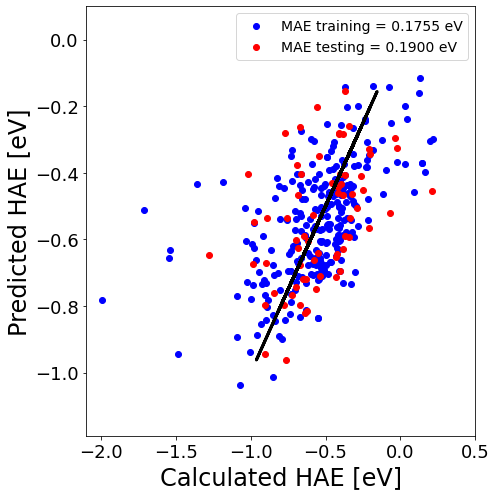

In [91]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7));


ax.scatter(Y_train_multi_LR,y_pred_train_multi_LR, color='blue', label='MAE training = 0.1755 eV');
ax.scatter(Y_test_multi_LR, y_pred_multi_LR, color='red', label='MAE testing = 0.1900 eV');


#ax.plot(X, reg.predict(X), color='red',linewidth=3);

plt.xlim((-2.1,0.5))
plt.ylim((-1.19,0.1))


ax.plot(reg.predict(X_test_multi_LR),y_pred_multi_LR, color='black', linewidth=3 ) #plot line



# Add a legend
ax.legend(fontsize="14")


#ax.grid(True,
#        axis = 'both',
#        zorder = 0,
#        linestyle = ':',
#        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Calculated HAE [eV]', fontsize = 24)
ax.set_ylabel('Predicted HAE [eV]', fontsize = 24)
#ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

plt.savefig('LR-multi-feature.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('LR-multi-feature.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Random Forest

In [93]:
data = pd.read_excel('/Users/adriandominguezcastro/Desktop/Full-Analysis/Data.xlsx')
#print(data)

In [94]:
dataset = data.values
Y = dataset[:,0:1]
X = dataset[:,1:15]

In [95]:
#Scale

#from sklearn import preprocessing

#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)

In [96]:
# I used before random_state=42
X_train_RF, X_test_RF, Y_train_RF, Y_test_RF = train_test_split(X, Y, random_state=42, train_size=0.8,test_size=0.2, shuffle=True)

In [97]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [98]:
params = {
    "n_estimators": 200,   
    "max_depth": 6,    # None            # "max_depth": 4,
    "min_samples_split": 4,        # "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,   # "random_state": 42,
}

In [99]:
reg =RandomForestRegressor(**params)

reg.fit(X_train_RF, Y_train_RF)

<ipython-input-99-07bb367658b8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train_RF, Y_train_RF)


RandomForestRegressor(max_depth=6, min_samples_split=4, n_estimators=200,
                      oob_score=True, random_state=42, warm_start=True)

In [100]:
y_pred_train_RF = reg.predict(X_train_RF) 
y_pred_RF = reg.predict(X_test_RF)

In [101]:
#mean_squared_error(Y_test, y_pred, squared=False)
#mean_absolute_error(Y_test, y_pred)

mae_train = mean_absolute_error(y_pred_train_RF, Y_train_RF) 
mae_test = mean_absolute_error(y_pred_RF, Y_test_RF) 
print('MAE on training set:', mae_train)
print('MAE on testing set:', mae_test)

MAE on training set: 0.10525983652149969
MAE on testing set: 0.1797359789249613


In [102]:
#R2
print('Score on training set:', reg.score(X_train_RF, Y_train_RF)) 
print('Score on test set:', reg.score(X_test_RF, Y_test_RF))

Score on training set: 0.7672138510219335
Score on test set: 0.255988746534474


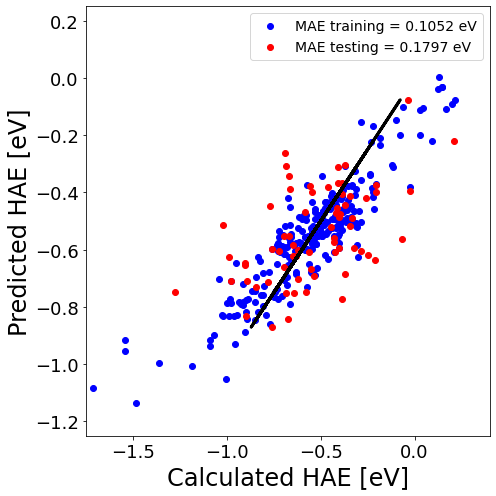

In [103]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7));


ax.scatter(Y_train_RF,y_pred_train_RF, color='blue', label='MAE training = 0.1052 eV');
ax.scatter(Y_test_RF, y_pred_RF, color='red', label='MAE testing = 0.1797 eV');


plt.xlim((-1.75,0.4))
plt.ylim((-1.25,0.25))


ax.plot(reg.predict(X_test_RF),y_pred_RF, color='black', linewidth=3 ) #plot line


# Add a legend
ax.legend(fontsize="14")

#ax.grid(True,
#        axis = 'both',
#        zorder = 0,
#        linestyle = ':',
#        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Calculated HAE [eV]', fontsize = 24)
ax.set_ylabel('Predicted HAE [eV]', fontsize = 24)
#ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

plt.savefig('RF.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('RF.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Neural Network 

In [112]:
data = pd.read_excel('/Users/adriandominguezcastro/Desktop/Full-Analysis/Data.xlsx')
#print(data)

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, PReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load your data and split it into features (X) and target (Y)
dataset = data.values
Y = dataset[:, 0:1]
X = dataset[:, 1:15]

# Perform Standardization (z-score scaling) on the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, shuffle=True)



# Splitting into training and testing sets (80% training, 20% testing)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further splitting the training set into training and validation sets (70% training, 30% validation)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)


# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)



# Create a Keras Sequential model
model = Sequential()

model.add(Dense(64, input_shape=(14,), activation='relu', kernel_regularizer=l2(0.2)))
model.add(BatchNormalization())
#model.add(PReLU())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.2)))
model.add(BatchNormalization())
#model.add(PReLU())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.2)))
model.add(BatchNormalization())
#model.add(PReLU())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.2)))
model.add(BatchNormalization())
#model.add(PReLU())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.2)))
model.add(BatchNormalization())
#model.add(PReLU())
model.add(Dropout(0.25))





# Output layer
model.add(Dense(1, activation='linear'))

model.summary()

# Define your learning rate
initial_learning_rate = 0.0001
#lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=200, min_lr=1e-6)

# Create the Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model with the optimizer and other settings
model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

# Early stopping callback with increased patience
#es = EarlyStopping(monitor='val_loss', mode='min', patience=1000, restore_best_weights=True)


# Perform KFold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled, Y)):
    print(f"Training on fold {fold + 1}")
    
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]



# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10000, batch_size=32, verbose=1)
#history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), callbacks=[es], epochs=10000, batch_size=32, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                960       
                                                                 
 batch_normalization_15 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_16 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 64)               

9/9 [==============================] - 0s 5ms/step - loss: 41.9085 - mae: 0.9175 - val_loss: 41.0982 - val_mae: 0.2975
Epoch 41/10000
9/9 [==============================] - 0s 5ms/step - loss: 41.5665 - mae: 0.8990 - val_loss: 40.7752 - val_mae: 0.2966
Epoch 42/10000
9/9 [==============================] - 0s 5ms/step - loss: 41.3455 - mae: 0.9990 - val_loss: 40.4562 - val_mae: 0.2970
Epoch 43/10000
9/9 [==============================] - 0s 5ms/step - loss: 40.9481 - mae: 0.9201 - val_loss: 40.1419 - val_mae: 0.2998
Epoch 44/10000
9/9 [==============================] - 0s 5ms/step - loss: 40.6074 - mae: 0.8956 - val_loss: 39.8282 - val_mae: 0.3009
Epoch 45/10000
9/9 [==============================] - 0s 5ms/step - loss: 40.2810 - mae: 0.8827 - val_loss: 39.5175 - val_mae: 0.3023
Epoch 46/10000
9/9 [==============================] - 0s 5ms/step - loss: 39.9484 - mae: 0.8614 - val_loss: 39.2068 - val_mae: 0.3016
Epoch 47/10000
9/9 [==============================] - 0s 5ms/step - loss: 39.

Epoch 162/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.8625 - mae: 0.5528 - val_loss: 15.4603 - val_mae: 0.2237
Epoch 163/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.7501 - mae: 0.5645 - val_loss: 15.3357 - val_mae: 0.2225
Epoch 164/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.5827 - mae: 0.5202 - val_loss: 15.2126 - val_mae: 0.2220
Epoch 165/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.4835 - mae: 0.5432 - val_loss: 15.0886 - val_mae: 0.2197
Epoch 166/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.3972 - mae: 0.5782 - val_loss: 14.9679 - val_mae: 0.2198
Epoch 167/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.2400 - mae: 0.5413 - val_loss: 14.8465 - val_mae: 0.2179
Epoch 168/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.1345 - mae: 0.5549 - val_loss: 14.7275 - val_mae: 0.2175
Epoch 169/10000
9/9 [==============================] - 

Epoch 223/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.7677 - mae: 0.4441 - val_loss: 9.4777 - val_mae: 0.1983
Epoch 224/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.7106 - mae: 0.4622 - val_loss: 9.4020 - val_mae: 0.1975
Epoch 225/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.6252 - mae: 0.4514 - val_loss: 9.3245 - val_mae: 0.1941
Epoch 226/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.5670 - mae: 0.4670 - val_loss: 9.2498 - val_mae: 0.1931
Epoch 227/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.4890 - mae: 0.4625 - val_loss: 9.1778 - val_mae: 0.1941
Epoch 228/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.3955 - mae: 0.4417 - val_loss: 9.1076 - val_mae: 0.1963
Epoch 229/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.3013 - mae: 0.4197 - val_loss: 9.0375 - val_mae: 0.1980
Epoch 230/10000
9/9 [==============================] - 0s 5ms/step - 

Epoch 346/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8113 - mae: 0.3160 - val_loss: 3.6597 - val_mae: 0.1807
Epoch 347/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8000 - mae: 0.3324 - val_loss: 3.6318 - val_mae: 0.1806
Epoch 348/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7553 - mae: 0.3154 - val_loss: 3.6071 - val_mae: 0.1832
Epoch 349/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7212 - mae: 0.3086 - val_loss: 3.5845 - val_mae: 0.1878
Epoch 350/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7056 - mae: 0.3201 - val_loss: 3.5582 - val_mae: 0.1886
Epoch 351/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6803 - mae: 0.3218 - val_loss: 3.5297 - val_mae: 0.1869
Epoch 352/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6423 - mae: 0.3105 - val_loss: 3.5045 - val_mae: 0.1883
Epoch 353/10000
9/9 [==============================] - 0s 5ms/step - 

Epoch 469/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.4973 - mae: 0.2479 - val_loss: 1.4163 - val_mae: 0.1735
Epoch 470/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.4925 - mae: 0.2544 - val_loss: 1.4061 - val_mae: 0.1745
Epoch 471/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.4711 - mae: 0.2440 - val_loss: 1.3918 - val_mae: 0.1712
Epoch 472/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.4642 - mae: 0.2481 - val_loss: 1.3784 - val_mae: 0.1688
Epoch 473/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.4689 - mae: 0.2638 - val_loss: 1.3781 - val_mae: 0.1794
Epoch 474/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.4387 - mae: 0.2445 - val_loss: 1.3782 - val_mae: 0.1904
Epoch 475/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.4454 - mae: 0.2620 - val_loss: 1.3699 - val_mae: 0.1928
Epoch 476/10000
9/9 [==============================] - 0s 5ms/step - 

Epoch 592/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.5949 - mae: 0.2265 - val_loss: 0.5210 - val_mae: 0.1549
Epoch 593/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.5668 - mae: 0.2023 - val_loss: 0.5176 - val_mae: 0.1555
Epoch 594/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.5636 - mae: 0.2031 - val_loss: 0.5095 - val_mae: 0.1513
Epoch 595/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.5555 - mae: 0.1988 - val_loss: 0.5032 - val_mae: 0.1489
Epoch 596/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.5726 - mae: 0.2198 - val_loss: 0.5009 - val_mae: 0.1503
Epoch 597/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.5442 - mae: 0.1952 - val_loss: 0.5001 - val_mae: 0.1533
Epoch 598/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.5563 - mae: 0.2111 - val_loss: 0.4974 - val_mae: 0.1544
Epoch 599/10000
9/9 [==============================] - 0s 5ms/step - 

Epoch 715/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.2417 - mae: 0.1423 - val_loss: 0.2142 - val_mae: 0.1154
Epoch 716/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.2458 - mae: 0.1474 - val_loss: 0.2135 - val_mae: 0.1156
Epoch 717/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.2479 - mae: 0.1503 - val_loss: 0.2064 - val_mae: 0.1093
Epoch 718/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.2394 - mae: 0.1427 - val_loss: 0.2031 - val_mae: 0.1069
Epoch 719/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.2374 - mae: 0.1416 - val_loss: 0.2025 - val_mae: 0.1073
Epoch 720/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.2441 - mae: 0.1493 - val_loss: 0.2043 - val_mae: 0.1101
Epoch 721/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.2415 - mae: 0.1477 - val_loss: 0.2102 - val_mae: 0.1170
Epoch 722/10000
9/9 [==============================] - 0s 5ms/step - 

Epoch 838/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1631 - mae: 0.1244 - val_loss: 0.1147 - val_mae: 0.0761
Epoch 839/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1612 - mae: 0.1227 - val_loss: 0.1288 - val_mae: 0.0905
Epoch 840/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1517 - mae: 0.1135 - val_loss: 0.1329 - val_mae: 0.0948
Epoch 841/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1666 - mae: 0.1286 - val_loss: 0.1277 - val_mae: 0.0897
Epoch 842/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1635 - mae: 0.1257 - val_loss: 0.1246 - val_mae: 0.0870
Epoch 843/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1617 - mae: 0.1243 - val_loss: 0.1255 - val_mae: 0.0882
Epoch 844/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1553 - mae: 0.1181 - val_loss: 0.1123 - val_mae: 0.0750
Epoch 845/10000
9/9 [==============================] - 0s 5ms/step - 

Epoch 961/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1453 - mae: 0.1190 - val_loss: 0.0960 - val_mae: 0.0698
Epoch 962/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1328 - mae: 0.1065 - val_loss: 0.0895 - val_mae: 0.0632
Epoch 963/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1348 - mae: 0.1086 - val_loss: 0.0925 - val_mae: 0.0663
Epoch 964/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1437 - mae: 0.1175 - val_loss: 0.0941 - val_mae: 0.0678
Epoch 965/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1369 - mae: 0.1107 - val_loss: 0.0920 - val_mae: 0.0657
Epoch 966/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1424 - mae: 0.1161 - val_loss: 0.0938 - val_mae: 0.0675
Epoch 967/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1389 - mae: 0.1127 - val_loss: 0.0962 - val_mae: 0.0700
Epoch 968/10000
9/9 [==============================] - 0s 5ms/step - 

9/9 [==============================] - 0s 5ms/step - loss: 0.1358 - mae: 0.1131 - val_loss: 0.0912 - val_mae: 0.0685
Epoch 1084/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1443 - mae: 0.1216 - val_loss: 0.0921 - val_mae: 0.0694
Epoch 1085/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1332 - mae: 0.1106 - val_loss: 0.0855 - val_mae: 0.0628
Epoch 1086/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1330 - mae: 0.1104 - val_loss: 0.0938 - val_mae: 0.0712
Epoch 1087/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1325 - mae: 0.1100 - val_loss: 0.0911 - val_mae: 0.0685
Epoch 1088/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1402 - mae: 0.1176 - val_loss: 0.0920 - val_mae: 0.0693
Epoch 1089/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1386 - mae: 0.1159 - val_loss: 0.0975 - val_mae: 0.0750
Epoch 1090/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1278 - mae: 0.1067 - val_loss: 0.0904 - val_mae: 0.0693
Epoch 1206/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1307 - mae: 0.1096 - val_loss: 0.0852 - val_mae: 0.0640
Epoch 1207/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1216 - mae: 0.1003 - val_loss: 0.0889 - val_mae: 0.0676
Epoch 1208/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1297 - mae: 0.1083 - val_loss: 0.0884 - val_mae: 0.0671
Epoch 1209/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1189 - mae: 0.0977 - val_loss: 0.0826 - val_mae: 0.0614
Epoch 1210/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1269 - mae: 0.1057 - val_loss: 0.0858 - val_mae: 0.0646
Epoch 1211/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1320 - mae: 0.1109 - val_loss: 0.0851 - val_mae: 0.0639
Epoch 1212/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1183 - mae: 0.0978 - val_loss: 0.0778 - val_mae: 0.0572
Epoch 1328/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1226 - mae: 0.1019 - val_loss: 0.0730 - val_mae: 0.0523
Epoch 1329/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1246 - mae: 0.1040 - val_loss: 0.0861 - val_mae: 0.0656
Epoch 1330/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1302 - mae: 0.1096 - val_loss: 0.0806 - val_mae: 0.0598
Epoch 1331/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1266 - mae: 0.1058 - val_loss: 0.0900 - val_mae: 0.0693
Epoch 1332/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1350 - mae: 0.1145 - val_loss: 0.0930 - val_mae: 0.0727
Epoch 1333/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1264 - mae: 0.1061 - val_loss: 0.0841 - val_mae: 0.0636
Epoch 1334/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1196 - mae: 0.0999 - val_loss: 0.0871 - val_mae: 0.0674
Epoch 1450/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1204 - mae: 0.1007 - val_loss: 0.0850 - val_mae: 0.0652
Epoch 1451/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1366 - mae: 0.1169 - val_loss: 0.0892 - val_mae: 0.0696
Epoch 1452/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1373 - mae: 0.1176 - val_loss: 0.0800 - val_mae: 0.0602
Epoch 1453/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1364 - mae: 0.1166 - val_loss: 0.0820 - val_mae: 0.0622
Epoch 1454/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1198 - mae: 0.1000 - val_loss: 0.0800 - val_mae: 0.0602
Epoch 1455/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1147 - mae: 0.0949 - val_loss: 0.0734 - val_mae: 0.0536
Epoch 1456/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1333 - mae: 0.1142 - val_loss: 0.0885 - val_mae: 0.0694
Epoch 1572/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1220 - mae: 0.1028 - val_loss: 0.0828 - val_mae: 0.0633
Epoch 1573/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1264 - mae: 0.1070 - val_loss: 0.0894 - val_mae: 0.0702
Epoch 1574/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1214 - mae: 0.1021 - val_loss: 0.0868 - val_mae: 0.0675
Epoch 1575/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1359 - mae: 0.1165 - val_loss: 0.0819 - val_mae: 0.0626
Epoch 1576/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1206 - mae: 0.1013 - val_loss: 0.0808 - val_mae: 0.0615
Epoch 1577/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1241 - mae: 0.1048 - val_loss: 0.0850 - val_mae: 0.0658
Epoch 1578/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1217 - mae: 0.1023 - val_loss: 0.0837 - val_mae: 0.0642
Epoch 1694/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1302 - mae: 0.1108 - val_loss: 0.0876 - val_mae: 0.0684
Epoch 1695/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1313 - mae: 0.1118 - val_loss: 0.0834 - val_mae: 0.0637
Epoch 1696/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1268 - mae: 0.1072 - val_loss: 0.0857 - val_mae: 0.0662
Epoch 1697/10000
9/9 [==============================] - 0s 6ms/step - loss: 0.1195 - mae: 0.1000 - val_loss: 0.0874 - val_mae: 0.0679
Epoch 1698/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1340 - mae: 0.1145 - val_loss: 0.0888 - val_mae: 0.0692
Epoch 1699/10000
9/9 [==============================] - 0s 6ms/step - loss: 0.1188 - mae: 0.0991 - val_loss: 0.0872 - val_mae: 0.0673
Epoch 1700/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1167 - mae: 0.0972 - val_loss: 0.0778 - val_mae: 0.0581
Epoch 1816/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1188 - mae: 0.0992 - val_loss: 0.0782 - val_mae: 0.0588
Epoch 1817/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1198 - mae: 0.1004 - val_loss: 0.0743 - val_mae: 0.0547
Epoch 1818/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1275 - mae: 0.1079 - val_loss: 0.0840 - val_mae: 0.0643
Epoch 1819/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1328 - mae: 0.1132 - val_loss: 0.0912 - val_mae: 0.0717
Epoch 1820/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1203 - mae: 0.1009 - val_loss: 0.0920 - val_mae: 0.0725
Epoch 1821/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1289 - mae: 0.1094 - val_loss: 0.0899 - val_mae: 0.0704
Epoch 1822/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1250 - mae: 0.1053 - val_loss: 0.0800 - val_mae: 0.0602
Epoch 1938/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1287 - mae: 0.1090 - val_loss: 0.0819 - val_mae: 0.0624
Epoch 1939/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1182 - mae: 0.0987 - val_loss: 0.0897 - val_mae: 0.0703
Epoch 1940/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1228 - mae: 0.1033 - val_loss: 0.0818 - val_mae: 0.0622
Epoch 1941/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1318 - mae: 0.1122 - val_loss: 0.0950 - val_mae: 0.0754
Epoch 1942/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1292 - mae: 0.1096 - val_loss: 0.0893 - val_mae: 0.0697
Epoch 1943/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1203 - mae: 0.1007 - val_loss: 0.0859 - val_mae: 0.0663
Epoch 1944/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1199 - mae: 0.1005 - val_loss: 0.0760 - val_mae: 0.0565
Epoch 2060/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1237 - mae: 0.1043 - val_loss: 0.0787 - val_mae: 0.0593
Epoch 2061/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1303 - mae: 0.1109 - val_loss: 0.0795 - val_mae: 0.0600
Epoch 2062/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1348 - mae: 0.1154 - val_loss: 0.0789 - val_mae: 0.0595
Epoch 2063/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1187 - mae: 0.0992 - val_loss: 0.0797 - val_mae: 0.0602
Epoch 2064/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1181 - mae: 0.0986 - val_loss: 0.0812 - val_mae: 0.0616
Epoch 2065/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1283 - mae: 0.1087 - val_loss: 0.0819 - val_mae: 0.0623
Epoch 2066/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1209 - mae: 0.1020 - val_loss: 0.0902 - val_mae: 0.0714
Epoch 2182/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1182 - mae: 0.0992 - val_loss: 0.0850 - val_mae: 0.0659
Epoch 2183/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1241 - mae: 0.1050 - val_loss: 0.0847 - val_mae: 0.0656
Epoch 2184/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1281 - mae: 0.1090 - val_loss: 0.0897 - val_mae: 0.0706
Epoch 2185/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1271 - mae: 0.1080 - val_loss: 0.0834 - val_mae: 0.0645
Epoch 2186/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1110 - mae: 0.0921 - val_loss: 0.0817 - val_mae: 0.0626
Epoch 2187/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1258 - mae: 0.1067 - val_loss: 0.0770 - val_mae: 0.0580
Epoch 2188/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1169 - mae: 0.0980 - val_loss: 0.0782 - val_mae: 0.0592
Epoch 2304/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1279 - mae: 0.1090 - val_loss: 0.0765 - val_mae: 0.0575
Epoch 2305/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1155 - mae: 0.0966 - val_loss: 0.0810 - val_mae: 0.0623
Epoch 2306/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1242 - mae: 0.1055 - val_loss: 0.0808 - val_mae: 0.0621
Epoch 2307/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1322 - mae: 0.1135 - val_loss: 0.0726 - val_mae: 0.0537
Epoch 2308/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1167 - mae: 0.0976 - val_loss: 0.0810 - val_mae: 0.0620
Epoch 2309/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1322 - mae: 0.1135 - val_loss: 0.0959 - val_mae: 0.0773
Epoch 2310/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1189 - mae: 0.1001 - val_loss: 0.0778 - val_mae: 0.0590
Epoch 2426/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1161 - mae: 0.0973 - val_loss: 0.0791 - val_mae: 0.0602
Epoch 2427/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1186 - mae: 0.0996 - val_loss: 0.0811 - val_mae: 0.0620
Epoch 2428/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1248 - mae: 0.1056 - val_loss: 0.0770 - val_mae: 0.0579
Epoch 2429/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1235 - mae: 0.1045 - val_loss: 0.0771 - val_mae: 0.0581
Epoch 2430/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1182 - mae: 0.0992 - val_loss: 0.0761 - val_mae: 0.0571
Epoch 2431/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1201 - mae: 0.1012 - val_loss: 0.0796 - val_mae: 0.0607
Epoch 2432/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1229 - mae: 0.1037 - val_loss: 0.0824 - val_mae: 0.0633
Epoch 2548/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1146 - mae: 0.0955 - val_loss: 0.0840 - val_mae: 0.0650
Epoch 2549/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1326 - mae: 0.1138 - val_loss: 0.0860 - val_mae: 0.0672
Epoch 2550/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1234 - mae: 0.1046 - val_loss: 0.0763 - val_mae: 0.0574
Epoch 2551/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1242 - mae: 0.1053 - val_loss: 0.0710 - val_mae: 0.0520
Epoch 2552/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1178 - mae: 0.0987 - val_loss: 0.0806 - val_mae: 0.0615
Epoch 2553/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1232 - mae: 0.1041 - val_loss: 0.0791 - val_mae: 0.0600
Epoch 2554/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1164 - mae: 0.0971 - val_loss: 0.0772 - val_mae: 0.0578
Epoch 2670/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1246 - mae: 0.1054 - val_loss: 0.0841 - val_mae: 0.0650
Epoch 2671/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1299 - mae: 0.1107 - val_loss: 0.0793 - val_mae: 0.0602
Epoch 2672/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1159 - mae: 0.0968 - val_loss: 0.0755 - val_mae: 0.0563
Epoch 2673/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.0937 - val_loss: 0.0814 - val_mae: 0.0623
Epoch 2674/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.0936 - val_loss: 0.0820 - val_mae: 0.0628
Epoch 2675/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1282 - mae: 0.1088 - val_loss: 0.0791 - val_mae: 0.0597
Epoch 2676/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1208 - mae: 0.1016 - val_loss: 0.0761 - val_mae: 0.0568
Epoch 2792/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1228 - mae: 0.1032 - val_loss: 0.0758 - val_mae: 0.0561
Epoch 2793/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1199 - mae: 0.1004 - val_loss: 0.0917 - val_mae: 0.0724
Epoch 2794/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1233 - mae: 0.1041 - val_loss: 0.0786 - val_mae: 0.0592
Epoch 2795/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1138 - mae: 0.0943 - val_loss: 0.0742 - val_mae: 0.0547
Epoch 2796/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1223 - mae: 0.1029 - val_loss: 0.0873 - val_mae: 0.0683
Epoch 2797/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0970 - val_loss: 0.0714 - val_mae: 0.0520
Epoch 2798/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1232 - mae: 0.1040 - val_loss: 0.0933 - val_mae: 0.0742
Epoch 2914/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1246 - mae: 0.1054 - val_loss: 0.0853 - val_mae: 0.0660
Epoch 2915/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1227 - mae: 0.1033 - val_loss: 0.0768 - val_mae: 0.0573
Epoch 2916/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1172 - mae: 0.0977 - val_loss: 0.0727 - val_mae: 0.0533
Epoch 2917/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1232 - mae: 0.1038 - val_loss: 0.0740 - val_mae: 0.0545
Epoch 2918/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1184 - mae: 0.0990 - val_loss: 0.0773 - val_mae: 0.0580
Epoch 2919/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1221 - mae: 0.1030 - val_loss: 0.0903 - val_mae: 0.0713
Epoch 2920/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1227 - mae: 0.1037 - val_loss: 0.0889 - val_mae: 0.0702
Epoch 3036/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1221 - mae: 0.1035 - val_loss: 0.0836 - val_mae: 0.0649
Epoch 3037/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1189 - mae: 0.1002 - val_loss: 0.0770 - val_mae: 0.0581
Epoch 3038/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1194 - mae: 0.1005 - val_loss: 0.0790 - val_mae: 0.0601
Epoch 3039/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1227 - mae: 0.1037 - val_loss: 0.0758 - val_mae: 0.0567
Epoch 3040/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0970 - val_loss: 0.0767 - val_mae: 0.0575
Epoch 3041/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1190 - mae: 0.0999 - val_loss: 0.0840 - val_mae: 0.0651
Epoch 3042/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1193 - mae: 0.1005 - val_loss: 0.0839 - val_mae: 0.0650
Epoch 3158/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1237 - mae: 0.1049 - val_loss: 0.0786 - val_mae: 0.0599
Epoch 3159/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1319 - mae: 0.1132 - val_loss: 0.0815 - val_mae: 0.0629
Epoch 3160/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1173 - mae: 0.0986 - val_loss: 0.0816 - val_mae: 0.0628
Epoch 3161/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1247 - mae: 0.1060 - val_loss: 0.0900 - val_mae: 0.0714
Epoch 3162/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1194 - mae: 0.1008 - val_loss: 0.0906 - val_mae: 0.0719
Epoch 3163/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1202 - mae: 0.1014 - val_loss: 0.0861 - val_mae: 0.0672
Epoch 3164/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1176 - mae: 0.0987 - val_loss: 0.0812 - val_mae: 0.0624
Epoch 3280/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1170 - mae: 0.0982 - val_loss: 0.0808 - val_mae: 0.0621
Epoch 3281/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1159 - mae: 0.0972 - val_loss: 0.0836 - val_mae: 0.0649
Epoch 3282/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1188 - mae: 0.1001 - val_loss: 0.0805 - val_mae: 0.0617
Epoch 3283/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1164 - mae: 0.0975 - val_loss: 0.0742 - val_mae: 0.0551
Epoch 3284/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1231 - mae: 0.1041 - val_loss: 0.0814 - val_mae: 0.0626
Epoch 3285/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1166 - mae: 0.0977 - val_loss: 0.0703 - val_mae: 0.0513
Epoch 3286/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1204 - mae: 0.1016 - val_loss: 0.0776 - val_mae: 0.0588
Epoch 3402/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1145 - mae: 0.0957 - val_loss: 0.0801 - val_mae: 0.0611
Epoch 3403/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1170 - mae: 0.0983 - val_loss: 0.0916 - val_mae: 0.0731
Epoch 3404/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1194 - mae: 0.1009 - val_loss: 0.0827 - val_mae: 0.0642
Epoch 3405/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1091 - mae: 0.0906 - val_loss: 0.0761 - val_mae: 0.0574
Epoch 3406/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1196 - mae: 0.1009 - val_loss: 0.0786 - val_mae: 0.0600
Epoch 3407/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1231 - mae: 0.1046 - val_loss: 0.0815 - val_mae: 0.0630
Epoch 3408/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1247 - mae: 0.1057 - val_loss: 0.0789 - val_mae: 0.0597
Epoch 3524/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1198 - mae: 0.1006 - val_loss: 0.0754 - val_mae: 0.0562
Epoch 3525/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1237 - mae: 0.1046 - val_loss: 0.0800 - val_mae: 0.0610
Epoch 3526/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1129 - mae: 0.0940 - val_loss: 0.0820 - val_mae: 0.0632
Epoch 3527/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1149 - mae: 0.0960 - val_loss: 0.0746 - val_mae: 0.0557
Epoch 3528/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1174 - mae: 0.0985 - val_loss: 0.0744 - val_mae: 0.0554
Epoch 3529/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1176 - mae: 0.0986 - val_loss: 0.0697 - val_mae: 0.0507
Epoch 3530/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1178 - mae: 0.0991 - val_loss: 0.0921 - val_mae: 0.0735
Epoch 3646/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1155 - mae: 0.0969 - val_loss: 0.0776 - val_mae: 0.0589
Epoch 3647/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1227 - mae: 0.1039 - val_loss: 0.0770 - val_mae: 0.0583
Epoch 3648/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1191 - mae: 0.1004 - val_loss: 0.0797 - val_mae: 0.0610
Epoch 3649/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1191 - mae: 0.1002 - val_loss: 0.0792 - val_mae: 0.0602
Epoch 3650/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1178 - mae: 0.0989 - val_loss: 0.0780 - val_mae: 0.0593
Epoch 3651/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1165 - mae: 0.0978 - val_loss: 0.0733 - val_mae: 0.0546
Epoch 3652/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1167 - mae: 0.0980 - val_loss: 0.0868 - val_mae: 0.0680
Epoch 3768/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1151 - mae: 0.0963 - val_loss: 0.0783 - val_mae: 0.0595
Epoch 3769/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1108 - mae: 0.0920 - val_loss: 0.0784 - val_mae: 0.0596
Epoch 3770/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1216 - mae: 0.1030 - val_loss: 0.0785 - val_mae: 0.0600
Epoch 3771/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1208 - mae: 0.1023 - val_loss: 0.0790 - val_mae: 0.0604
Epoch 3772/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1108 - mae: 0.0922 - val_loss: 0.0810 - val_mae: 0.0624
Epoch 3773/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1112 - mae: 0.0925 - val_loss: 0.0832 - val_mae: 0.0646
Epoch 3774/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1180 - mae: 0.0991 - val_loss: 0.0787 - val_mae: 0.0601
Epoch 3890/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1182 - mae: 0.0994 - val_loss: 0.0796 - val_mae: 0.0609
Epoch 3891/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1135 - mae: 0.0948 - val_loss: 0.0772 - val_mae: 0.0585
Epoch 3892/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1238 - mae: 0.1050 - val_loss: 0.0723 - val_mae: 0.0536
Epoch 3893/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1266 - mae: 0.1080 - val_loss: 0.0782 - val_mae: 0.0598
Epoch 3894/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1297 - mae: 0.1112 - val_loss: 0.0690 - val_mae: 0.0504
Epoch 3895/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1158 - mae: 0.0971 - val_loss: 0.0721 - val_mae: 0.0536
Epoch 3896/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1224 - mae: 0.1033 - val_loss: 0.0755 - val_mae: 0.0564
Epoch 4012/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1155 - mae: 0.0967 - val_loss: 0.0849 - val_mae: 0.0663
Epoch 4013/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1168 - mae: 0.0982 - val_loss: 0.0702 - val_mae: 0.0514
Epoch 4014/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1160 - mae: 0.0972 - val_loss: 0.0721 - val_mae: 0.0533
Epoch 4015/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1142 - mae: 0.0954 - val_loss: 0.0810 - val_mae: 0.0620
Epoch 4016/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1309 - mae: 0.1119 - val_loss: 0.0765 - val_mae: 0.0575
Epoch 4017/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1137 - mae: 0.0947 - val_loss: 0.0714 - val_mae: 0.0524
Epoch 4018/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1186 - mae: 0.0999 - val_loss: 0.0808 - val_mae: 0.0621
Epoch 4134/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1165 - mae: 0.0978 - val_loss: 0.0769 - val_mae: 0.0581
Epoch 4135/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1251 - mae: 0.1063 - val_loss: 0.0800 - val_mae: 0.0613
Epoch 4136/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1202 - mae: 0.1014 - val_loss: 0.0722 - val_mae: 0.0533
Epoch 4137/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1149 - mae: 0.0959 - val_loss: 0.0726 - val_mae: 0.0537
Epoch 4138/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1178 - mae: 0.0989 - val_loss: 0.0860 - val_mae: 0.0672
Epoch 4139/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1103 - mae: 0.0915 - val_loss: 0.0717 - val_mae: 0.0529
Epoch 4140/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1065 - mae: 0.0877 - val_loss: 0.0835 - val_mae: 0.0647
Epoch 4256/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1200 - mae: 0.1013 - val_loss: 0.0870 - val_mae: 0.0684
Epoch 4257/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1264 - mae: 0.1078 - val_loss: 0.0751 - val_mae: 0.0566
Epoch 4258/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1076 - mae: 0.0891 - val_loss: 0.0780 - val_mae: 0.0595
Epoch 4259/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1185 - mae: 0.1001 - val_loss: 0.0807 - val_mae: 0.0623
Epoch 4260/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1258 - mae: 0.1074 - val_loss: 0.0746 - val_mae: 0.0562
Epoch 4261/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1177 - mae: 0.0992 - val_loss: 0.0727 - val_mae: 0.0542
Epoch 4262/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.0941 - val_loss: 0.0681 - val_mae: 0.0494
Epoch 4378/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1113 - mae: 0.0925 - val_loss: 0.0756 - val_mae: 0.0569
Epoch 4379/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1191 - mae: 0.1003 - val_loss: 0.0691 - val_mae: 0.0503
Epoch 4380/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1196 - mae: 0.1009 - val_loss: 0.0845 - val_mae: 0.0660
Epoch 4381/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1249 - mae: 0.1063 - val_loss: 0.0753 - val_mae: 0.0566
Epoch 4382/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1187 - mae: 0.1001 - val_loss: 0.0771 - val_mae: 0.0588
Epoch 4383/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1199 - mae: 0.1015 - val_loss: 0.0771 - val_mae: 0.0587
Epoch 4384/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1207 - mae: 0.1022 - val_loss: 0.0830 - val_mae: 0.0646
Epoch 4500/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1187 - mae: 0.1002 - val_loss: 0.0751 - val_mae: 0.0564
Epoch 4501/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.0941 - val_loss: 0.0691 - val_mae: 0.0503
Epoch 4502/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1153 - mae: 0.0967 - val_loss: 0.0919 - val_mae: 0.0736
Epoch 4503/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0978 - val_loss: 0.0691 - val_mae: 0.0506
Epoch 4504/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1111 - mae: 0.0924 - val_loss: 0.0691 - val_mae: 0.0505
Epoch 4505/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1230 - mae: 0.1045 - val_loss: 0.0856 - val_mae: 0.0672
Epoch 4506/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1177 - mae: 0.0990 - val_loss: 0.0743 - val_mae: 0.0557
Epoch 4622/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1088 - mae: 0.0902 - val_loss: 0.0689 - val_mae: 0.0501
Epoch 4623/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1170 - mae: 0.0981 - val_loss: 0.0701 - val_mae: 0.0513
Epoch 4624/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1171 - mae: 0.0983 - val_loss: 0.0767 - val_mae: 0.0580
Epoch 4625/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1343 - mae: 0.1156 - val_loss: 0.0776 - val_mae: 0.0590
Epoch 4626/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1210 - mae: 0.1024 - val_loss: 0.0762 - val_mae: 0.0575
Epoch 4627/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1168 - mae: 0.0981 - val_loss: 0.0807 - val_mae: 0.0620
Epoch 4628/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1155 - mae: 0.0970 - val_loss: 0.0775 - val_mae: 0.0589
Epoch 4744/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1198 - mae: 0.1013 - val_loss: 0.0736 - val_mae: 0.0551
Epoch 4745/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1266 - mae: 0.1080 - val_loss: 0.0736 - val_mae: 0.0550
Epoch 4746/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0977 - val_loss: 0.0765 - val_mae: 0.0580
Epoch 4747/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1117 - mae: 0.0932 - val_loss: 0.0713 - val_mae: 0.0526
Epoch 4748/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1185 - mae: 0.0997 - val_loss: 0.0702 - val_mae: 0.0514
Epoch 4749/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1101 - mae: 0.0914 - val_loss: 0.0773 - val_mae: 0.0588
Epoch 4750/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1244 - mae: 0.1060 - val_loss: 0.0682 - val_mae: 0.0499
Epoch 4866/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1154 - mae: 0.0971 - val_loss: 0.0707 - val_mae: 0.0525
Epoch 4867/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1153 - mae: 0.0970 - val_loss: 0.0692 - val_mae: 0.0509
Epoch 4868/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1181 - mae: 0.0998 - val_loss: 0.0792 - val_mae: 0.0611
Epoch 4869/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1229 - mae: 0.1048 - val_loss: 0.0810 - val_mae: 0.0629
Epoch 4870/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1129 - mae: 0.0947 - val_loss: 0.0693 - val_mae: 0.0510
Epoch 4871/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1193 - mae: 0.1010 - val_loss: 0.0710 - val_mae: 0.0529
Epoch 4872/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1190 - mae: 0.1005 - val_loss: 0.0726 - val_mae: 0.0541
Epoch 4988/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1063 - mae: 0.0878 - val_loss: 0.0778 - val_mae: 0.0593
Epoch 4989/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1196 - mae: 0.1012 - val_loss: 0.0831 - val_mae: 0.0647
Epoch 4990/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1248 - mae: 0.1064 - val_loss: 0.0823 - val_mae: 0.0639
Epoch 4991/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1156 - mae: 0.0972 - val_loss: 0.0803 - val_mae: 0.0619
Epoch 4992/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1251 - mae: 0.1066 - val_loss: 0.0824 - val_mae: 0.0640
Epoch 4993/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1206 - mae: 0.1021 - val_loss: 0.0753 - val_mae: 0.0569
Epoch 4994/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1223 - mae: 0.1038 - val_loss: 0.0705 - val_mae: 0.0519
Epoch 5110/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1148 - mae: 0.0963 - val_loss: 0.0669 - val_mae: 0.0484
Epoch 5111/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1117 - mae: 0.0931 - val_loss: 0.0670 - val_mae: 0.0484
Epoch 5112/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1158 - mae: 0.0972 - val_loss: 0.0729 - val_mae: 0.0544
Epoch 5113/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1195 - mae: 0.1010 - val_loss: 0.0807 - val_mae: 0.0622
Epoch 5114/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1216 - mae: 0.1030 - val_loss: 0.0725 - val_mae: 0.0538
Epoch 5115/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1151 - mae: 0.0965 - val_loss: 0.0800 - val_mae: 0.0614
Epoch 5116/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1232 - mae: 0.1047 - val_loss: 0.0739 - val_mae: 0.0555
Epoch 5232/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1179 - mae: 0.0996 - val_loss: 0.0747 - val_mae: 0.0565
Epoch 5233/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1132 - mae: 0.0948 - val_loss: 0.0712 - val_mae: 0.0526
Epoch 5234/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1286 - mae: 0.1100 - val_loss: 0.0736 - val_mae: 0.0552
Epoch 5235/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1217 - mae: 0.1035 - val_loss: 0.0722 - val_mae: 0.0539
Epoch 5236/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1282 - mae: 0.1099 - val_loss: 0.0715 - val_mae: 0.0531
Epoch 5237/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1155 - mae: 0.0971 - val_loss: 0.0776 - val_mae: 0.0593
Epoch 5238/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1163 - mae: 0.0979 - val_loss: 0.0841 - val_mae: 0.0659
Epoch 5354/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1254 - mae: 0.1071 - val_loss: 0.0741 - val_mae: 0.0558
Epoch 5355/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1183 - mae: 0.1000 - val_loss: 0.0796 - val_mae: 0.0614
Epoch 5356/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1182 - mae: 0.0999 - val_loss: 0.0700 - val_mae: 0.0516
Epoch 5357/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1282 - mae: 0.1099 - val_loss: 0.0780 - val_mae: 0.0598
Epoch 5358/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1125 - mae: 0.0942 - val_loss: 0.0716 - val_mae: 0.0532
Epoch 5359/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1160 - mae: 0.0976 - val_loss: 0.0765 - val_mae: 0.0582
Epoch 5360/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1277 - mae: 0.1092 - val_loss: 0.0739 - val_mae: 0.0555
Epoch 5476/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1134 - mae: 0.0951 - val_loss: 0.0771 - val_mae: 0.0588
Epoch 5477/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1126 - mae: 0.0943 - val_loss: 0.0679 - val_mae: 0.0494
Epoch 5478/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1164 - mae: 0.0979 - val_loss: 0.0710 - val_mae: 0.0527
Epoch 5479/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1097 - mae: 0.0914 - val_loss: 0.0701 - val_mae: 0.0518
Epoch 5480/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1154 - mae: 0.0972 - val_loss: 0.0680 - val_mae: 0.0498
Epoch 5481/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1149 - mae: 0.0967 - val_loss: 0.0720 - val_mae: 0.0538
Epoch 5482/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1056 - mae: 0.0870 - val_loss: 0.0756 - val_mae: 0.0569
Epoch 5598/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1217 - mae: 0.1032 - val_loss: 0.0750 - val_mae: 0.0567
Epoch 5599/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1191 - mae: 0.1008 - val_loss: 0.0687 - val_mae: 0.0503
Epoch 5600/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1093 - mae: 0.0908 - val_loss: 0.0716 - val_mae: 0.0530
Epoch 5601/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1181 - mae: 0.0996 - val_loss: 0.0803 - val_mae: 0.0619
Epoch 5602/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1157 - mae: 0.0973 - val_loss: 0.0849 - val_mae: 0.0664
Epoch 5603/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1150 - mae: 0.0965 - val_loss: 0.0775 - val_mae: 0.0590
Epoch 5604/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1175 - mae: 0.0994 - val_loss: 0.0777 - val_mae: 0.0595
Epoch 5720/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1091 - mae: 0.0908 - val_loss: 0.0817 - val_mae: 0.0632
Epoch 5721/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1086 - mae: 0.0902 - val_loss: 0.0823 - val_mae: 0.0639
Epoch 5722/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1085 - mae: 0.0900 - val_loss: 0.0761 - val_mae: 0.0576
Epoch 5723/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1130 - mae: 0.0945 - val_loss: 0.0773 - val_mae: 0.0587
Epoch 5724/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1094 - mae: 0.0908 - val_loss: 0.0710 - val_mae: 0.0524
Epoch 5725/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1122 - mae: 0.0937 - val_loss: 0.0752 - val_mae: 0.0568
Epoch 5726/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1175 - mae: 0.0996 - val_loss: 0.0740 - val_mae: 0.0561
Epoch 5842/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1056 - mae: 0.0877 - val_loss: 0.0744 - val_mae: 0.0564
Epoch 5843/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1107 - mae: 0.0928 - val_loss: 0.0671 - val_mae: 0.0492
Epoch 5844/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1070 - mae: 0.0891 - val_loss: 0.0689 - val_mae: 0.0510
Epoch 5845/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1220 - mae: 0.1040 - val_loss: 0.0794 - val_mae: 0.0613
Epoch 5846/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1205 - mae: 0.1026 - val_loss: 0.0865 - val_mae: 0.0688
Epoch 5847/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1290 - mae: 0.1112 - val_loss: 0.0815 - val_mae: 0.0637
Epoch 5848/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1094 - mae: 0.0913 - val_loss: 0.0816 - val_mae: 0.0635
Epoch 5964/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1120 - mae: 0.0939 - val_loss: 0.0749 - val_mae: 0.0567
Epoch 5965/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1165 - mae: 0.0981 - val_loss: 0.0740 - val_mae: 0.0555
Epoch 5966/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1234 - mae: 0.1051 - val_loss: 0.0819 - val_mae: 0.0637
Epoch 5967/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1080 - mae: 0.0895 - val_loss: 0.0744 - val_mae: 0.0559
Epoch 5968/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1112 - mae: 0.0927 - val_loss: 0.0830 - val_mae: 0.0646
Epoch 5969/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1154 - mae: 0.0970 - val_loss: 0.0808 - val_mae: 0.0623
Epoch 5970/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1100 - mae: 0.0915 - val_loss: 0.0746 - val_mae: 0.0561
Epoch 6086/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1099 - mae: 0.0914 - val_loss: 0.0757 - val_mae: 0.0572
Epoch 6087/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.0942 - val_loss: 0.0780 - val_mae: 0.0595
Epoch 6088/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1170 - mae: 0.0984 - val_loss: 0.0791 - val_mae: 0.0605
Epoch 6089/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1149 - mae: 0.0964 - val_loss: 0.0833 - val_mae: 0.0648
Epoch 6090/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1063 - mae: 0.0879 - val_loss: 0.0778 - val_mae: 0.0594
Epoch 6091/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1130 - mae: 0.0946 - val_loss: 0.0734 - val_mae: 0.0552
Epoch 6092/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1047 - mae: 0.0867 - val_loss: 0.0718 - val_mae: 0.0538
Epoch 6208/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1199 - mae: 0.1018 - val_loss: 0.0681 - val_mae: 0.0501
Epoch 6209/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1129 - mae: 0.0949 - val_loss: 0.0655 - val_mae: 0.0474
Epoch 6210/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1071 - mae: 0.0891 - val_loss: 0.0693 - val_mae: 0.0512
Epoch 6211/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1191 - mae: 0.1010 - val_loss: 0.0664 - val_mae: 0.0482
Epoch 6212/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1104 - mae: 0.0922 - val_loss: 0.0759 - val_mae: 0.0579
Epoch 6213/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1158 - mae: 0.0976 - val_loss: 0.0713 - val_mae: 0.0531
Epoch 6214/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1184 - mae: 0.1004 - val_loss: 0.0720 - val_mae: 0.0541
Epoch 6330/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1234 - mae: 0.1054 - val_loss: 0.0759 - val_mae: 0.0578
Epoch 6331/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1089 - mae: 0.0908 - val_loss: 0.0762 - val_mae: 0.0580
Epoch 6332/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1190 - mae: 0.1006 - val_loss: 0.0700 - val_mae: 0.0516
Epoch 6333/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1190 - mae: 0.1008 - val_loss: 0.0921 - val_mae: 0.0740
Epoch 6334/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1196 - mae: 0.1015 - val_loss: 0.0746 - val_mae: 0.0563
Epoch 6335/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1208 - mae: 0.1025 - val_loss: 0.0812 - val_mae: 0.0629
Epoch 6336/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1206 - mae: 0.1028 - val_loss: 0.0771 - val_mae: 0.0594
Epoch 6452/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1159 - mae: 0.0981 - val_loss: 0.0760 - val_mae: 0.0581
Epoch 6453/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1147 - mae: 0.0968 - val_loss: 0.0768 - val_mae: 0.0590
Epoch 6454/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1142 - mae: 0.0963 - val_loss: 0.0702 - val_mae: 0.0523
Epoch 6455/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1270 - mae: 0.1089 - val_loss: 0.0765 - val_mae: 0.0583
Epoch 6456/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1081 - mae: 0.0900 - val_loss: 0.0847 - val_mae: 0.0666
Epoch 6457/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1233 - mae: 0.1052 - val_loss: 0.0915 - val_mae: 0.0735
Epoch 6458/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1215 - mae: 0.1036 - val_loss: 0.0786 - val_mae: 0.0606
Epoch 6574/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1158 - mae: 0.0978 - val_loss: 0.0740 - val_mae: 0.0559
Epoch 6575/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1148 - mae: 0.0967 - val_loss: 0.0746 - val_mae: 0.0565
Epoch 6576/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1085 - mae: 0.0904 - val_loss: 0.0746 - val_mae: 0.0566
Epoch 6577/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1115 - mae: 0.0934 - val_loss: 0.0775 - val_mae: 0.0595
Epoch 6578/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1082 - mae: 0.0902 - val_loss: 0.0765 - val_mae: 0.0585
Epoch 6579/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1112 - mae: 0.0933 - val_loss: 0.0873 - val_mae: 0.0695
Epoch 6580/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1123 - mae: 0.0943 - val_loss: 0.0645 - val_mae: 0.0463
Epoch 6696/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1159 - mae: 0.0979 - val_loss: 0.0744 - val_mae: 0.0566
Epoch 6697/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1098 - mae: 0.0918 - val_loss: 0.0775 - val_mae: 0.0594
Epoch 6698/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1241 - mae: 0.1061 - val_loss: 0.0744 - val_mae: 0.0564
Epoch 6699/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1236 - mae: 0.1056 - val_loss: 0.0747 - val_mae: 0.0566
Epoch 6700/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1235 - mae: 0.1054 - val_loss: 0.0819 - val_mae: 0.0639
Epoch 6701/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1208 - mae: 0.1028 - val_loss: 0.0723 - val_mae: 0.0542
Epoch 6702/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1165 - mae: 0.0987 - val_loss: 0.0709 - val_mae: 0.0531
Epoch 6818/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1148 - mae: 0.0971 - val_loss: 0.0706 - val_mae: 0.0529
Epoch 6819/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1239 - mae: 0.1061 - val_loss: 0.0854 - val_mae: 0.0675
Epoch 6820/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1172 - mae: 0.0994 - val_loss: 0.0868 - val_mae: 0.0692
Epoch 6821/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1152 - mae: 0.0976 - val_loss: 0.0769 - val_mae: 0.0591
Epoch 6822/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1171 - mae: 0.0992 - val_loss: 0.0797 - val_mae: 0.0616
Epoch 6823/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1236 - mae: 0.1057 - val_loss: 0.0804 - val_mae: 0.0626
Epoch 6824/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0984 - val_loss: 0.0667 - val_mae: 0.0488
Epoch 6940/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1137 - mae: 0.0957 - val_loss: 0.0729 - val_mae: 0.0548
Epoch 6941/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1047 - mae: 0.0867 - val_loss: 0.0682 - val_mae: 0.0504
Epoch 6942/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.0949 - val_loss: 0.0789 - val_mae: 0.0608
Epoch 6943/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1198 - mae: 0.1018 - val_loss: 0.0758 - val_mae: 0.0579
Epoch 6944/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1133 - mae: 0.0955 - val_loss: 0.0813 - val_mae: 0.0635
Epoch 6945/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1078 - mae: 0.0899 - val_loss: 0.0734 - val_mae: 0.0554
Epoch 6946/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1151 - mae: 0.0971 - val_loss: 0.0746 - val_mae: 0.0567
Epoch 7062/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1275 - mae: 0.1097 - val_loss: 0.0787 - val_mae: 0.0608
Epoch 7063/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1091 - mae: 0.0911 - val_loss: 0.0757 - val_mae: 0.0576
Epoch 7064/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1125 - mae: 0.0945 - val_loss: 0.0792 - val_mae: 0.0611
Epoch 7065/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1180 - mae: 0.0999 - val_loss: 0.0806 - val_mae: 0.0625
Epoch 7066/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1167 - mae: 0.0986 - val_loss: 0.0834 - val_mae: 0.0653
Epoch 7067/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1190 - mae: 0.1011 - val_loss: 0.0857 - val_mae: 0.0678
Epoch 7068/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1080 - mae: 0.0899 - val_loss: 0.0690 - val_mae: 0.0508
Epoch 7184/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1211 - mae: 0.1028 - val_loss: 0.0693 - val_mae: 0.0511
Epoch 7185/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1117 - mae: 0.0936 - val_loss: 0.0747 - val_mae: 0.0565
Epoch 7186/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1154 - mae: 0.0971 - val_loss: 0.0802 - val_mae: 0.0619
Epoch 7187/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1251 - mae: 0.1069 - val_loss: 0.0801 - val_mae: 0.0619
Epoch 7188/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1206 - mae: 0.1024 - val_loss: 0.0735 - val_mae: 0.0552
Epoch 7189/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1207 - mae: 0.1025 - val_loss: 0.0677 - val_mae: 0.0494
Epoch 7190/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1150 - mae: 0.0967 - val_loss: 0.0759 - val_mae: 0.0576
Epoch 7306/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1160 - mae: 0.0978 - val_loss: 0.0738 - val_mae: 0.0558
Epoch 7307/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1154 - mae: 0.0973 - val_loss: 0.0761 - val_mae: 0.0580
Epoch 7308/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1156 - mae: 0.0977 - val_loss: 0.0729 - val_mae: 0.0550
Epoch 7309/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1083 - mae: 0.0904 - val_loss: 0.0726 - val_mae: 0.0547
Epoch 7310/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1164 - mae: 0.0983 - val_loss: 0.0683 - val_mae: 0.0501
Epoch 7311/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1168 - mae: 0.0987 - val_loss: 0.0649 - val_mae: 0.0469
Epoch 7312/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1061 - mae: 0.0884 - val_loss: 0.0791 - val_mae: 0.0613
Epoch 7428/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1140 - mae: 0.0962 - val_loss: 0.0713 - val_mae: 0.0532
Epoch 7429/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1133 - mae: 0.0954 - val_loss: 0.0749 - val_mae: 0.0571
Epoch 7430/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1106 - mae: 0.0929 - val_loss: 0.0753 - val_mae: 0.0576
Epoch 7431/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1120 - mae: 0.0943 - val_loss: 0.0735 - val_mae: 0.0557
Epoch 7432/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1231 - mae: 0.1054 - val_loss: 0.0829 - val_mae: 0.0653
Epoch 7433/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1143 - mae: 0.0966 - val_loss: 0.0833 - val_mae: 0.0654
Epoch 7434/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1075 - mae: 0.0895 - val_loss: 0.0674 - val_mae: 0.0493
Epoch 7550/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1124 - mae: 0.0943 - val_loss: 0.0633 - val_mae: 0.0451
Epoch 7551/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1046 - mae: 0.0864 - val_loss: 0.0631 - val_mae: 0.0448
Epoch 7552/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1135 - mae: 0.0954 - val_loss: 0.0681 - val_mae: 0.0500
Epoch 7553/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1101 - mae: 0.0921 - val_loss: 0.0680 - val_mae: 0.0499
Epoch 7554/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1205 - mae: 0.1024 - val_loss: 0.0705 - val_mae: 0.0524
Epoch 7555/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1296 - mae: 0.1115 - val_loss: 0.0734 - val_mae: 0.0553
Epoch 7556/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0984 - val_loss: 0.0725 - val_mae: 0.0547
Epoch 7672/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1194 - mae: 0.1016 - val_loss: 0.0737 - val_mae: 0.0558
Epoch 7673/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1108 - mae: 0.0930 - val_loss: 0.0702 - val_mae: 0.0523
Epoch 7674/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1141 - mae: 0.0961 - val_loss: 0.0726 - val_mae: 0.0546
Epoch 7675/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1130 - mae: 0.0951 - val_loss: 0.0821 - val_mae: 0.0643
Epoch 7676/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1148 - mae: 0.0971 - val_loss: 0.0802 - val_mae: 0.0624
Epoch 7677/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1015 - mae: 0.0836 - val_loss: 0.0747 - val_mae: 0.0567
Epoch 7678/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1045 - mae: 0.0868 - val_loss: 0.0718 - val_mae: 0.0541
Epoch 7794/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1080 - mae: 0.0904 - val_loss: 0.0725 - val_mae: 0.0550
Epoch 7795/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1256 - mae: 0.1080 - val_loss: 0.0667 - val_mae: 0.0491
Epoch 7796/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1064 - mae: 0.0888 - val_loss: 0.0659 - val_mae: 0.0484
Epoch 7797/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1213 - mae: 0.1038 - val_loss: 0.0778 - val_mae: 0.0604
Epoch 7798/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1123 - mae: 0.0949 - val_loss: 0.0734 - val_mae: 0.0559
Epoch 7799/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1194 - mae: 0.1019 - val_loss: 0.0710 - val_mae: 0.0535
Epoch 7800/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1115 - mae: 0.0939 - val_loss: 0.0865 - val_mae: 0.0689
Epoch 7916/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1180 - mae: 0.1004 - val_loss: 0.0810 - val_mae: 0.0634
Epoch 7917/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1175 - mae: 0.0999 - val_loss: 0.0785 - val_mae: 0.0610
Epoch 7918/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1133 - mae: 0.0958 - val_loss: 0.0740 - val_mae: 0.0565
Epoch 7919/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1099 - mae: 0.0923 - val_loss: 0.0713 - val_mae: 0.0537
Epoch 7920/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1134 - mae: 0.0958 - val_loss: 0.0744 - val_mae: 0.0569
Epoch 7921/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1126 - mae: 0.0951 - val_loss: 0.0770 - val_mae: 0.0594
Epoch 7922/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1173 - mae: 0.0995 - val_loss: 0.0899 - val_mae: 0.0722
Epoch 8038/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1164 - mae: 0.0986 - val_loss: 0.0794 - val_mae: 0.0615
Epoch 8039/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1181 - mae: 0.1003 - val_loss: 0.0791 - val_mae: 0.0613
Epoch 8040/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1118 - mae: 0.0938 - val_loss: 0.0732 - val_mae: 0.0550
Epoch 8041/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1127 - mae: 0.0946 - val_loss: 0.0873 - val_mae: 0.0693
Epoch 8042/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1127 - mae: 0.0948 - val_loss: 0.0871 - val_mae: 0.0692
Epoch 8043/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1115 - mae: 0.0937 - val_loss: 0.0788 - val_mae: 0.0611
Epoch 8044/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1104 - mae: 0.0925 - val_loss: 0.0729 - val_mae: 0.0550
Epoch 8160/10000
9/9 [==============================] - 0s 6ms/step - loss: 0.1080 - mae: 0.0901 - val_loss: 0.0805 - val_mae: 0.0628
Epoch 8161/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1141 - mae: 0.0964 - val_loss: 0.0828 - val_mae: 0.0650
Epoch 8162/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1073 - mae: 0.0896 - val_loss: 0.0919 - val_mae: 0.0743
Epoch 8163/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1057 - mae: 0.0881 - val_loss: 0.0831 - val_mae: 0.0655
Epoch 8164/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1056 - mae: 0.0879 - val_loss: 0.0786 - val_mae: 0.0610
Epoch 8165/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1204 - mae: 0.1027 - val_loss: 0.0710 - val_mae: 0.0534
Epoch 8166/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1133 - mae: 0.0957 - val_loss: 0.0695 - val_mae: 0.0518
Epoch 8282/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.0990 - mae: 0.0812 - val_loss: 0.0676 - val_mae: 0.0496
Epoch 8283/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1146 - mae: 0.0966 - val_loss: 0.0740 - val_mae: 0.0562
Epoch 8284/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1186 - mae: 0.1007 - val_loss: 0.0696 - val_mae: 0.0518
Epoch 8285/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1288 - mae: 0.1110 - val_loss: 0.0705 - val_mae: 0.0527
Epoch 8286/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1138 - mae: 0.0960 - val_loss: 0.0740 - val_mae: 0.0562
Epoch 8287/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1175 - mae: 0.0996 - val_loss: 0.0766 - val_mae: 0.0586
Epoch 8288/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1286 - mae: 0.1110 - val_loss: 0.0760 - val_mae: 0.0585
Epoch 8404/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1203 - mae: 0.1028 - val_loss: 0.0751 - val_mae: 0.0576
Epoch 8405/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1191 - mae: 0.1017 - val_loss: 0.0740 - val_mae: 0.0566
Epoch 8406/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1150 - mae: 0.0976 - val_loss: 0.0727 - val_mae: 0.0553
Epoch 8407/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1106 - mae: 0.0930 - val_loss: 0.0697 - val_mae: 0.0520
Epoch 8408/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1084 - mae: 0.0907 - val_loss: 0.0759 - val_mae: 0.0583
Epoch 8409/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1132 - mae: 0.0957 - val_loss: 0.0826 - val_mae: 0.0650
Epoch 8410/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1118 - mae: 0.0944 - val_loss: 0.0806 - val_mae: 0.0631
Epoch 8526/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1144 - mae: 0.0967 - val_loss: 0.0795 - val_mae: 0.0616
Epoch 8527/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0984 - val_loss: 0.0769 - val_mae: 0.0594
Epoch 8528/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1071 - mae: 0.0895 - val_loss: 0.0724 - val_mae: 0.0546
Epoch 8529/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1067 - mae: 0.0889 - val_loss: 0.0636 - val_mae: 0.0459
Epoch 8530/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1344 - mae: 0.1167 - val_loss: 0.0860 - val_mae: 0.0686
Epoch 8531/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1200 - mae: 0.1025 - val_loss: 0.0734 - val_mae: 0.0559
Epoch 8532/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1195 - mae: 0.1018 - val_loss: 0.0730 - val_mae: 0.0555
Epoch 8648/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1178 - mae: 0.1004 - val_loss: 0.0817 - val_mae: 0.0644
Epoch 8649/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1208 - mae: 0.1033 - val_loss: 0.0677 - val_mae: 0.0501
Epoch 8650/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1169 - mae: 0.0994 - val_loss: 0.0811 - val_mae: 0.0638
Epoch 8651/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1130 - mae: 0.0957 - val_loss: 0.0777 - val_mae: 0.0604
Epoch 8652/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1172 - mae: 0.0999 - val_loss: 0.0741 - val_mae: 0.0569
Epoch 8653/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1118 - mae: 0.0946 - val_loss: 0.0739 - val_mae: 0.0565
Epoch 8654/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1160 - mae: 0.0984 - val_loss: 0.0712 - val_mae: 0.0537
Epoch 8770/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1132 - mae: 0.0958 - val_loss: 0.0710 - val_mae: 0.0536
Epoch 8771/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1122 - mae: 0.0947 - val_loss: 0.0713 - val_mae: 0.0537
Epoch 8772/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1229 - mae: 0.1054 - val_loss: 0.0733 - val_mae: 0.0557
Epoch 8773/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1124 - mae: 0.0948 - val_loss: 0.0705 - val_mae: 0.0530
Epoch 8774/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1080 - mae: 0.0905 - val_loss: 0.0691 - val_mae: 0.0516
Epoch 8775/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1047 - mae: 0.0872 - val_loss: 0.0704 - val_mae: 0.0528
Epoch 8776/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1076 - mae: 0.0900 - val_loss: 0.0688 - val_mae: 0.0512
Epoch 8892/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1237 - mae: 0.1062 - val_loss: 0.0750 - val_mae: 0.0576
Epoch 8893/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1254 - mae: 0.1081 - val_loss: 0.0708 - val_mae: 0.0534
Epoch 8894/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1136 - mae: 0.0962 - val_loss: 0.0665 - val_mae: 0.0490
Epoch 8895/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1156 - mae: 0.0981 - val_loss: 0.0669 - val_mae: 0.0494
Epoch 8896/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1165 - mae: 0.0990 - val_loss: 0.0701 - val_mae: 0.0526
Epoch 8897/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1083 - mae: 0.0908 - val_loss: 0.0732 - val_mae: 0.0559
Epoch 8898/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1061 - mae: 0.0889 - val_loss: 0.0753 - val_mae: 0.0580
Epoch 9014/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1097 - mae: 0.0925 - val_loss: 0.0758 - val_mae: 0.0585
Epoch 9015/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1087 - mae: 0.0913 - val_loss: 0.0719 - val_mae: 0.0544
Epoch 9016/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1066 - mae: 0.0890 - val_loss: 0.0704 - val_mae: 0.0530
Epoch 9017/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1102 - mae: 0.0929 - val_loss: 0.0757 - val_mae: 0.0584
Epoch 9018/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1192 - mae: 0.1018 - val_loss: 0.0752 - val_mae: 0.0577
Epoch 9019/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1197 - mae: 0.1022 - val_loss: 0.0791 - val_mae: 0.0616
Epoch 9020/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1098 - mae: 0.0923 - val_loss: 0.0767 - val_mae: 0.0591
Epoch 9136/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1087 - mae: 0.0909 - val_loss: 0.0690 - val_mae: 0.0511
Epoch 9137/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1208 - mae: 0.1030 - val_loss: 0.0728 - val_mae: 0.0552
Epoch 9138/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1016 - mae: 0.0841 - val_loss: 0.0738 - val_mae: 0.0562
Epoch 9139/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1125 - mae: 0.0949 - val_loss: 0.0804 - val_mae: 0.0629
Epoch 9140/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1026 - mae: 0.0852 - val_loss: 0.0765 - val_mae: 0.0591
Epoch 9141/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1277 - mae: 0.1102 - val_loss: 0.0789 - val_mae: 0.0613
Epoch 9142/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1163 - mae: 0.0990 - val_loss: 0.0883 - val_mae: 0.0710
Epoch 9258/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1303 - mae: 0.1130 - val_loss: 0.0849 - val_mae: 0.0676
Epoch 9259/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1072 - mae: 0.0896 - val_loss: 0.0769 - val_mae: 0.0593
Epoch 9260/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1150 - mae: 0.0974 - val_loss: 0.0727 - val_mae: 0.0550
Epoch 9261/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1268 - mae: 0.1091 - val_loss: 0.0689 - val_mae: 0.0512
Epoch 9262/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1146 - mae: 0.0969 - val_loss: 0.0671 - val_mae: 0.0494
Epoch 9263/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1088 - mae: 0.0911 - val_loss: 0.0734 - val_mae: 0.0557
Epoch 9264/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1143 - mae: 0.0973 - val_loss: 0.0680 - val_mae: 0.0510
Epoch 9380/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1176 - mae: 0.1006 - val_loss: 0.0643 - val_mae: 0.0471
Epoch 9381/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1074 - mae: 0.0904 - val_loss: 0.0715 - val_mae: 0.0545
Epoch 9382/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1109 - mae: 0.0938 - val_loss: 0.0716 - val_mae: 0.0544
Epoch 9383/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1153 - mae: 0.0982 - val_loss: 0.0757 - val_mae: 0.0586
Epoch 9384/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1132 - mae: 0.0960 - val_loss: 0.0747 - val_mae: 0.0575
Epoch 9385/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1170 - mae: 0.0998 - val_loss: 0.0725 - val_mae: 0.0553
Epoch 9386/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1120 - mae: 0.0948 - val_loss: 0.0727 - val_mae: 0.0555
Epoch 9502/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1156 - mae: 0.0983 - val_loss: 0.0672 - val_mae: 0.0498
Epoch 9503/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1118 - mae: 0.0944 - val_loss: 0.0668 - val_mae: 0.0493
Epoch 9504/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1238 - mae: 0.1064 - val_loss: 0.0803 - val_mae: 0.0631
Epoch 9505/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1275 - mae: 0.1103 - val_loss: 0.0724 - val_mae: 0.0551
Epoch 9506/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1078 - mae: 0.0905 - val_loss: 0.0708 - val_mae: 0.0534
Epoch 9507/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1166 - mae: 0.0993 - val_loss: 0.0684 - val_mae: 0.0510
Epoch 9508/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1191 - mae: 0.1019 - val_loss: 0.0712 - val_mae: 0.0541
Epoch 9624/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1126 - mae: 0.0955 - val_loss: 0.0695 - val_mae: 0.0525
Epoch 9625/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1104 - mae: 0.0934 - val_loss: 0.0716 - val_mae: 0.0546
Epoch 9626/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1120 - mae: 0.0950 - val_loss: 0.0772 - val_mae: 0.0601
Epoch 9627/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1104 - mae: 0.0934 - val_loss: 0.0649 - val_mae: 0.0479
Epoch 9628/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1166 - mae: 0.0995 - val_loss: 0.0687 - val_mae: 0.0518
Epoch 9629/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1147 - mae: 0.0976 - val_loss: 0.0678 - val_mae: 0.0508
Epoch 9630/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1039 - mae: 0.0869 - val_loss: 0.0746 - val_mae: 0.0575
Epoch 9746/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1037 - mae: 0.0865 - val_loss: 0.0733 - val_mae: 0.0560
Epoch 9747/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1138 - mae: 0.0967 - val_loss: 0.0762 - val_mae: 0.0591
Epoch 9748/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1067 - mae: 0.0894 - val_loss: 0.0716 - val_mae: 0.0543
Epoch 9749/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1113 - mae: 0.0942 - val_loss: 0.0767 - val_mae: 0.0596
Epoch 9750/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.0956 - val_loss: 0.0789 - val_mae: 0.0617
Epoch 9751/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1174 - mae: 0.1002 - val_loss: 0.0806 - val_mae: 0.0633
Epoch 9752/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1085 - mae: 0.0913 - val_loss: 0.0867 - val_mae: 0.0695
Epoch 9868/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1072 - mae: 0.0901 - val_loss: 0.0783 - val_mae: 0.0611
Epoch 9869/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1125 - mae: 0.0953 - val_loss: 0.0683 - val_mae: 0.0512
Epoch 9870/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1166 - mae: 0.0994 - val_loss: 0.0682 - val_mae: 0.0510
Epoch 9871/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1101 - mae: 0.0928 - val_loss: 0.0708 - val_mae: 0.0537
Epoch 9872/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1234 - mae: 0.1063 - val_loss: 0.0805 - val_mae: 0.0635
Epoch 9873/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0993 - val_loss: 0.0789 - val_mae: 0.0620
Epoch 9874/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

9/9 [==============================] - 0s 5ms/step - loss: 0.1282 - mae: 0.1114 - val_loss: 0.0809 - val_mae: 0.0639
Epoch 9990/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1162 - mae: 0.0993 - val_loss: 0.0782 - val_mae: 0.0613
Epoch 9991/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1034 - mae: 0.0865 - val_loss: 0.0695 - val_mae: 0.0523
Epoch 9992/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1198 - mae: 0.1025 - val_loss: 0.0733 - val_mae: 0.0560
Epoch 9993/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1263 - mae: 0.1093 - val_loss: 0.0964 - val_mae: 0.0796
Epoch 9994/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1121 - mae: 0.0952 - val_loss: 0.0808 - val_mae: 0.0638
Epoch 9995/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1224 - mae: 0.1055 - val_loss: 0.0796 - val_mae: 0.0627
Epoch 9996/10000
9/9 [==============================] - 0s 5ms/step - loss: 0.1

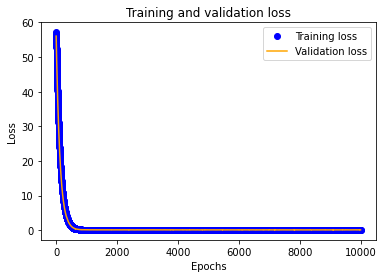

In [119]:
import matplotlib.pyplot as plt

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 [==============================] - 0s 2ms/step


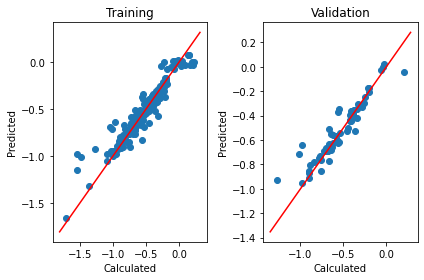

In [120]:
import numpy as np

# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=Y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Calculated", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=Y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Calculated", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [121]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_train, trainpreds)) # train
print(mean_absolute_error(Y_test, pred)) # test

9/9 [==============================] - 0s 2ms/step
0.0546356186127365
0.05645773966554138


In [122]:
# Calculates and prints R2 score of training and testing data
from sklearn.metrics import r2_score

print("The R2 score on the train set is:\t{:0.3f}".format(r2_score(Y_train,trainpreds)))
print("The R2 score on the test set is:\t{:0.3f}".format(r2_score(Y_test,pred)))

The R2 score on the train set is:	0.895
The R2 score on the test set is:	0.868


3/3 [==============================] - 0s 3ms/step


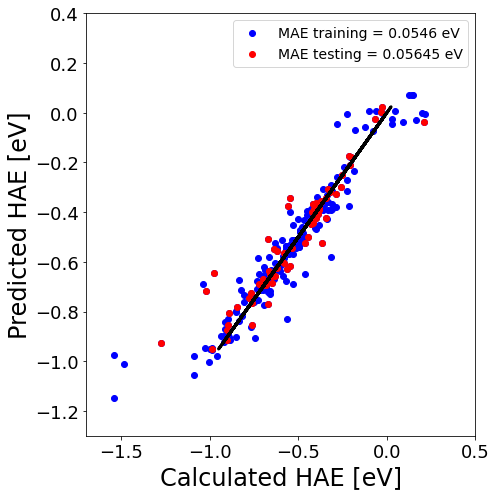

In [126]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7));


ax.scatter(Y_train,trainpreds, color='blue', label='MAE training = 0.0546 eV');
ax.scatter(Y_test,pred, color='red', label='MAE testing = 0.05645 eV');


#ax.plot(X, reg.predict(X), color='red',linewidth=3);

plt.xlim((-1.7,0.5))
plt.ylim((-1.3,0.4))

ax.plot(model.predict(X_test),pred, color='black', linewidth=3 ) #plot line


# Add a legend
ax.legend(fontsize="14")

#ax.grid(True,
#        axis = 'both',
#        zorder = 0,
#        linestyle = ':',
#        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Calculated HAE [eV]', fontsize = 24)
ax.set_ylabel('Predicted HAE [eV]', fontsize = 24)
#ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

plt.savefig('plot-DNN.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('plot-DNN.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Plotting all the testing results in one plot and compared to the perfect line

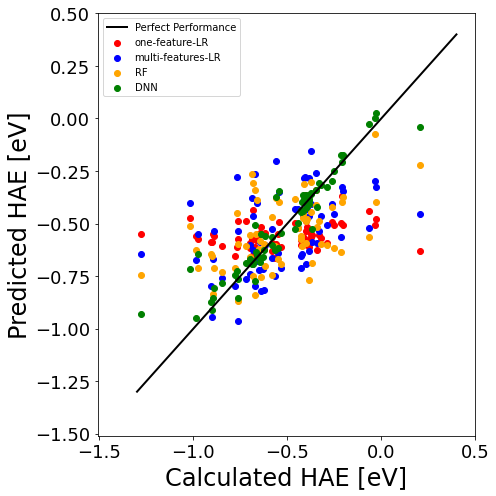

In [124]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7));


#ax.scatter(Y_train_one_LR,y_pred_train_one_LR, color='black');
ax.scatter(Y_test_one_LR, y_pred_one_LR, color='red', label='one-feature-LR');


#ax.scatter(Y_train_multi_LR,y_pred_train_multi_LR, color='blue');
ax.scatter(Y_test_multi_LR, y_pred_multi_LR, color='blue', label='multi-features-LR');


#ax.scatter(Y_train_RF,y_pred_train_RF, color='blue');
ax.scatter(Y_test_RF, y_pred_RF, color='orange', label='RF');

#ax.scatter(Y_train_NN,trainpreds_NN, color='blue');
#ax.scatter(Y_test_NN,pred_NN, color='green', label='ANN');


ax.scatter(Y_test,pred, color='green', label='DNN');

plt.xlim((-1.51,0.5))
plt.ylim((-1.51,0.5))


#ax.plot(reg.predict(X_test),y_pred, color='black', linewidth=3 ) #plot line


# Define the range for x values
x = np.linspace(-1.3, 0.4, 200)  # Adjust the range and number of points as needed

# Calculate the corresponding y values
y = x  # y equals x for this function

# Create the plot
#plt.figure(figsize=(8, 6))  # Optional: Set the figure size
ax.plot(x, y, label='Perfect Performance', color='black', linewidth=2)  # 'b' for blue, adjust line style and width


# Add a legend
ax.legend()


#ax.grid(True,
#        axis = 'both',
#        zorder = 0,
#        linestyle = ':',
#        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Calculated HAE [eV]', fontsize = 24)
ax.set_ylabel('Predicted HAE [eV]', fontsize = 24)
#ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

#plt.savefig('ALL.png', format='png', dpi=300, bbox_inches='tight')
#plt.savefig('ALL.pdf', format='pdf', dpi=300, bbox_inches='tight')

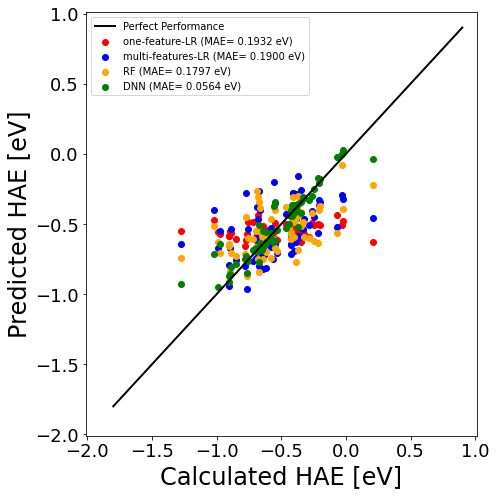

In [125]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7));


#ax.scatter(Y_train_one_LR,y_pred_train_one_LR, color='black');
ax.scatter(Y_test_one_LR, y_pred_one_LR, color='red', label='one-feature-LR (MAE= 0.1932 eV)');


#ax.scatter(Y_train_multi_LR,y_pred_train_multi_LR, color='blue');
ax.scatter(Y_test_multi_LR, y_pred_multi_LR, color='blue', label='multi-features-LR (MAE= 0.1900 eV)');


#ax.scatter(Y_train_RF,y_pred_train_RF, color='blue');
ax.scatter(Y_test_RF, y_pred_RF, color='orange', label='RF (MAE= 0.1797 eV)');

#ax.scatter(Y_train_NN,trainpreds_NN, color='blue');
#ax.scatter(Y_test_NN,pred_NN, color='green', label='ANN');


ax.scatter(Y_test,pred, color='green', label='DNN (MAE= 0.0564 eV)');

plt.xlim((-2.01,1.01))
plt.ylim((-2.01,1.01))


#ax.plot(reg.predict(X_test),y_pred, color='black', linewidth=3 ) #plot line


# Define the range for x values
x = np.linspace(-1.8, 0.9, 200)  # Adjust the range and number of points as needed

# Calculate the corresponding y values
y = x  # y equals x for this function

# Create the plot
#plt.figure(figsize=(8, 6))  # Optional: Set the figure size
ax.plot(x, y, label='Perfect Performance', color='black', linewidth=2)  # 'b' for blue, adjust line style and width


# Add a legend
ax.legend()


#ax.grid(True,
#        axis = 'both',
#        zorder = 0,
#        linestyle = ':',
#        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Calculated HAE [eV]', fontsize = 24)
ax.set_ylabel('Predicted HAE [eV]', fontsize = 24)
#ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

plt.savefig('ALL.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('ALL.pdf', format='pdf', dpi=300, bbox_inches='tight')